# Project: Conversion Rate Challenge - Supervised Machine Learning

## 1. Exploratory Data Analysis

The first step before developing a predictive model is to study the data available through graphical visualizations.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.kaleido.scope.plotlyjs = r'C:\Users\Public\plotly\package_data\plotly.min.js'
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "png" # Comment / delete this line for interactive graphs

from IPython.display import display

In [2]:
data = pd.read_csv('data/conversion_data_train.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


In [4]:
data.describe(include = "all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [5]:
# Find unique values in each column
for column in data.columns:
    uniques = sorted(data[column].unique())
    print(f"Column '{column}' has {len(uniques)} unique values, including: {uniques[:5]}")

Column 'country' has 4 unique values, including: ['China', 'Germany', 'UK', 'US']
Column 'age' has 60 unique values, including: [17, 18, 19, 20, 21]
Column 'new_user' has 2 unique values, including: [0, 1]
Column 'source' has 3 unique values, including: ['Ads', 'Direct', 'Seo']
Column 'total_pages_visited' has 29 unique values, including: [1, 2, 3, 4, 5]
Column 'converted' has 2 unique values, including: [0, 1]


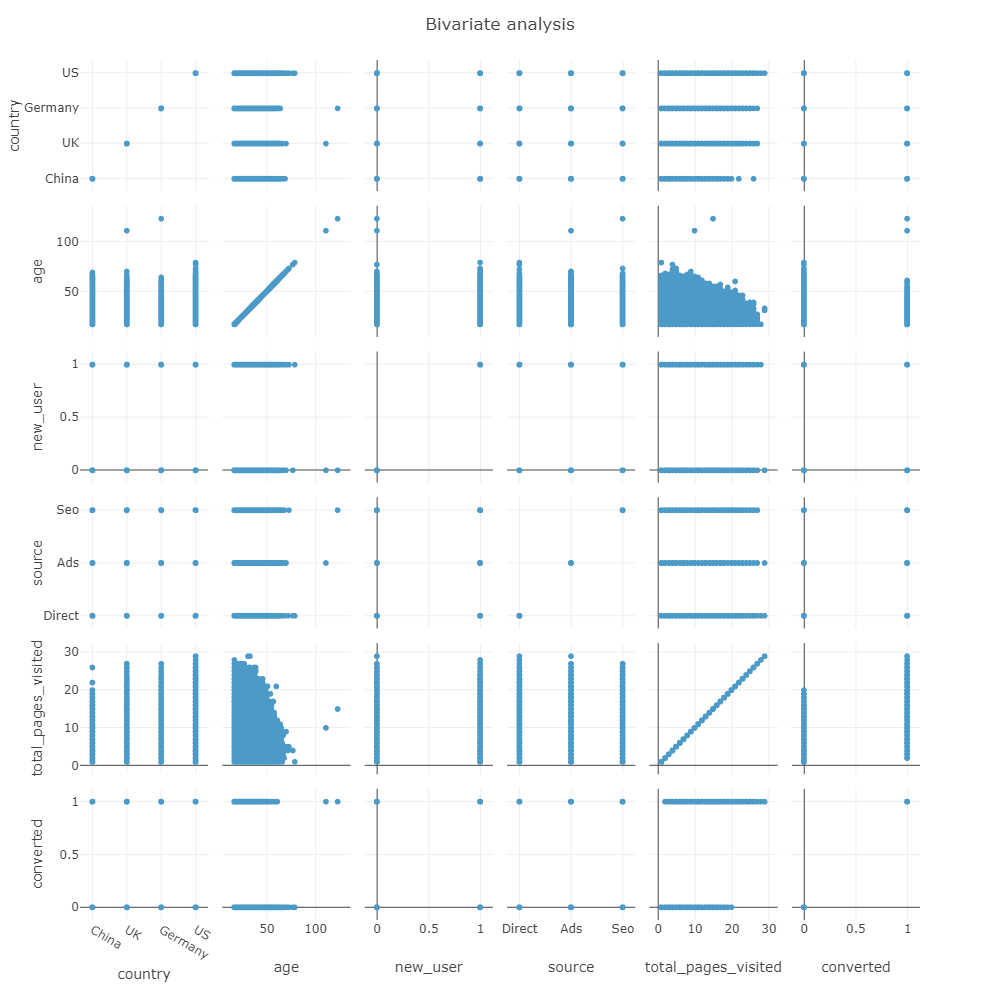

In [6]:
# Let's look at the correlation between the variables two by two
correlation_fig = px.scatter_matrix(data)
correlation_fig.update_layout(
            title = go.layout.Title(text = "Bivariate analysis", x = 0.5), 
            showlegend = False, autosize = False, height = 1000, width = 1000)
correlation_fig.show()

If we look at the graphs presented above and showing the relationship between two specific variables, we do not observe a linear relationship between two variables, which tells us that there is no dependence between them. Meaning that they can all be used for the later model training.  
We can also observe that the most important feature on the conversion rate is the total number of visited pages.    
  
Now let's look at the relationship between different variables and the number of conversions.

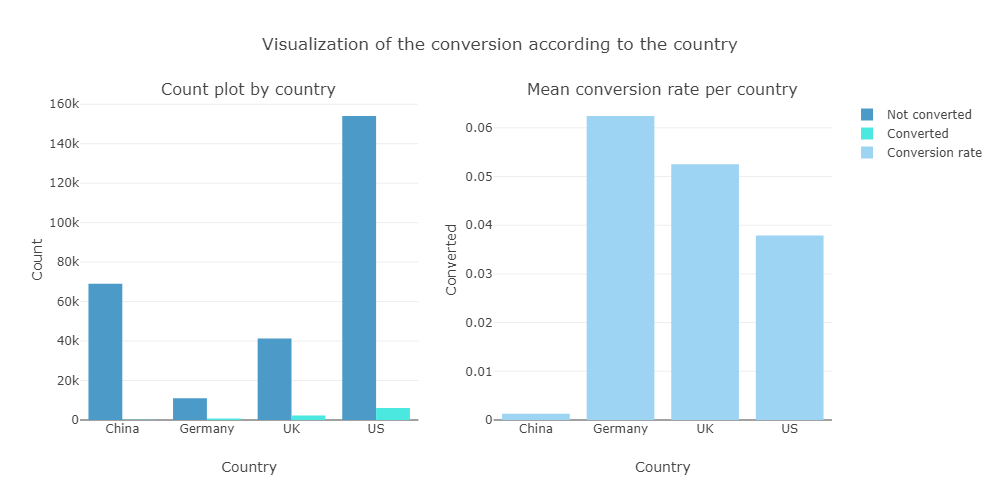

In [8]:
# Country conversion

country_conv_mean = data[["country", "converted"]].groupby("country").mean().reset_index()

country_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Count plot by country", "Mean conversion rate per country"))

country_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 0')['converted'],
                                   x = data.query('converted == 0')["country"],
                                   name = "Not converted"),
                      row = 1, col = 1)
country_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 1')['converted'],
                                   x = data.query('converted == 1')["country"],
                                   name = "Converted"),
                      row = 1, col = 1)

country_fig.add_trace(go.Bar(x = country_conv_mean["country"], y = country_conv_mean["converted"], name = "Conversion rate"),
                      row = 1, col = 2)

country_fig.update_layout(title_text = "Visualization of the conversion according to the country", width = 1000)
country_fig.update_xaxes(title_text = "Country", categoryorder = 'array', categoryarray= ["China", "Germany", "UK", "US"], row = 1, col = 1)
country_fig.update_xaxes(title_text = "Country", categoryorder = 'array', categoryarray= ["China", "Germany", "UK", "US"],  row = 1, col = 2)
country_fig.update_yaxes(title_text = "Count",row = 1, col = 1)
country_fig.update_yaxes(title_text = "Converted", row = 1, col = 2)

From the graph above, it can be seen that the conversion frequency is overall quite low.  
However, China is the country with the lowest value (close to 0), unlike Germany which presents the highest value (> 0.06).

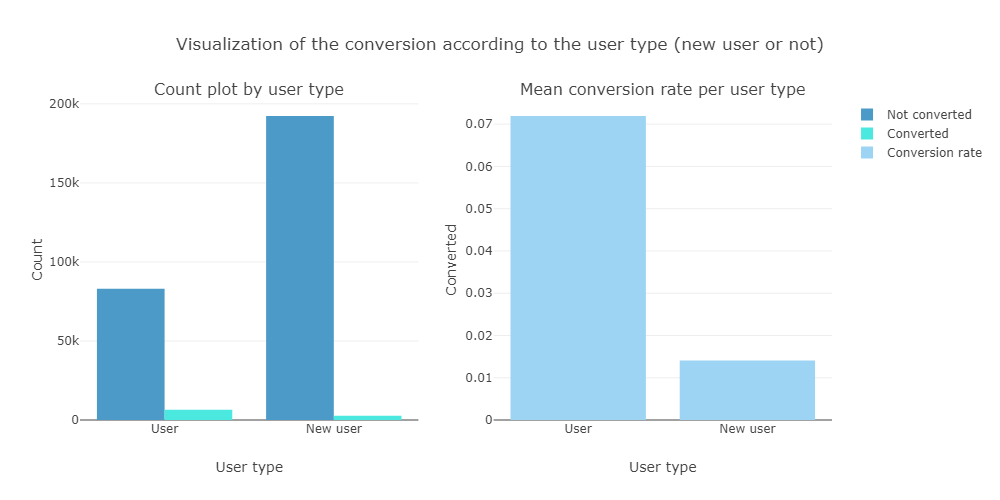

In [9]:
# User type conversion

user_conv_mean = data[["new_user", "converted"]].groupby("new_user").mean().reset_index()
user_conv_mean["new_user"] = user_conv_mean["new_user"].apply(lambda x: "New user" if x == 1 else "User")

user_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Count plot by user type", "Mean conversion rate per user type"))

user_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 0')['converted'],
                                   x = data.query('converted == 0')["new_user"].apply(lambda x: "New user" if x == 1 else "User"),
                                   name = "Not converted"),
                      row = 1, col = 1)
user_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 1')['converted'],
                                   x = data.query('converted == 1')["new_user"].apply(lambda x: "New user" if x == 1 else "User"),
                                   name = "Converted"),
                      row = 1, col = 1)

user_fig.add_trace(go.Bar(x = user_conv_mean["new_user"], y = user_conv_mean["converted"], name = "Conversion rate"),
                      row = 1, col = 2)

user_fig.update_layout(title_text = "Visualization of the conversion according to the user type (new user or not)", width = 1000)
user_fig.update_xaxes(title_text = "User type", categoryorder = 'array', categoryarray= ["User", "New user"], row = 1, col = 1)
user_fig.update_xaxes(title_text = "User type", categoryorder = 'array', categoryarray= ["User", "New user"], row = 1, col = 2)
user_fig.update_yaxes(title_text = "Count",row = 1, col = 1)
user_fig.update_yaxes(title_text = "Converted", row = 1, col = 2)

We can see on this last graph that the conversion rate is higher among users who already know the site than among new users.

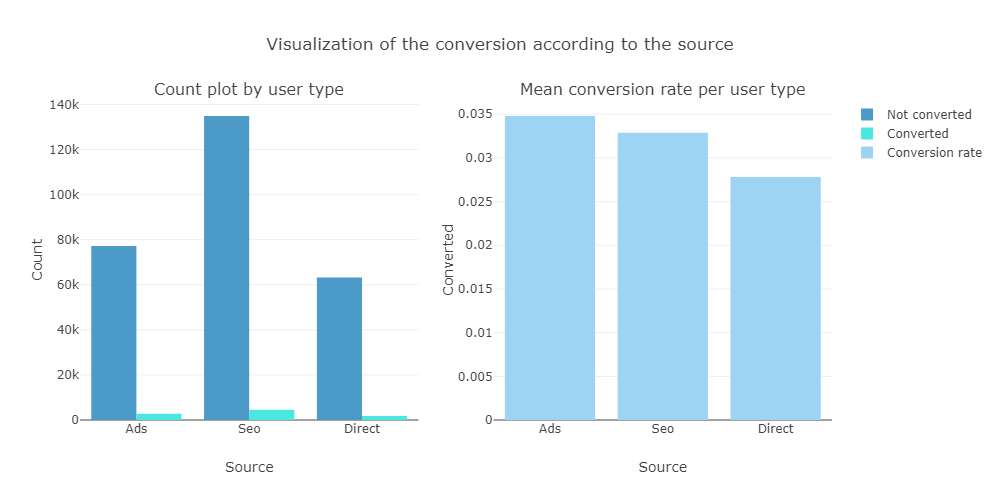

In [10]:
# Conversion vs sources

source_conv_mean = data[["source", "converted"]].groupby("source").mean().reset_index()

source_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Count plot by user type", "Mean conversion rate per user type"))

source_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 0')['converted'],
                                   x = data.query('converted == 0')["source"],
                                   name = "Not converted"),
                      row = 1, col = 1)
source_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 1')['converted'],
                                   x = data.query('converted == 1')["source"],
                                   name = "Converted"),
                      row = 1, col = 1)

source_fig.add_trace(go.Bar(x = source_conv_mean["source"], y = source_conv_mean["converted"], name = "Conversion rate"),
                      row = 1, col = 2)

source_fig.update_layout(title_text = "Visualization of the conversion according to the source", width = 1000)
source_fig.update_xaxes(title_text = "Source", categoryorder = 'array', categoryarray= ["Ads", "Seo", "Direct"], row = 1, col = 1)
source_fig.update_xaxes(title_text = "Source", categoryorder = 'array', categoryarray= ["Ads", "Seo", "Direct"], row = 1, col = 2)
source_fig.update_yaxes(title_text = "Count",row = 1, col = 1)
source_fig.update_yaxes(title_text = "Converted", row = 1, col = 2)

On this graph, we can see that whatever the source at the origin of the user's arrival, the conversion rate is close.  
The direct source however seems slightly less effective.

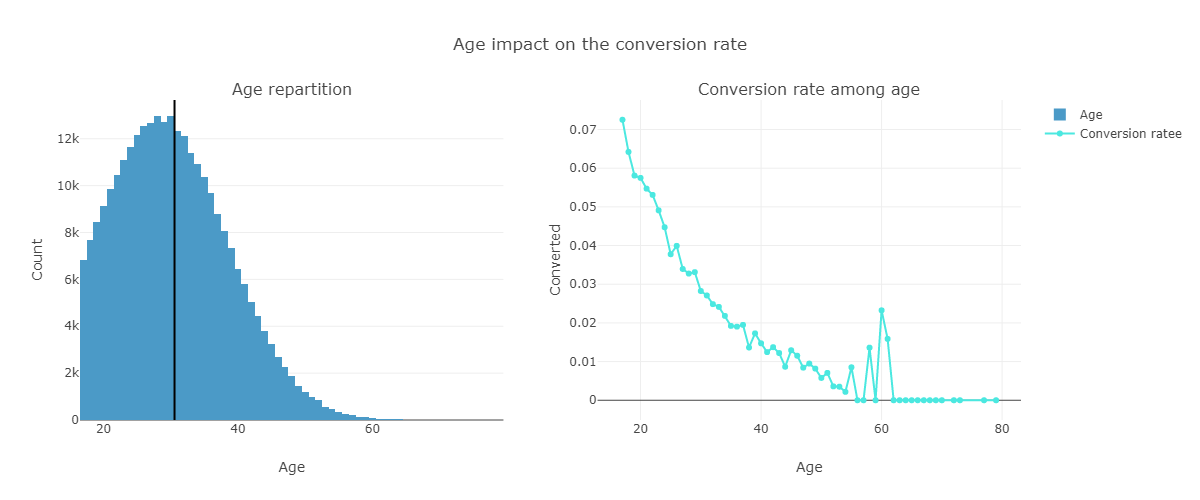

In [11]:
# Age vs conversion

data = data[data['age'] < 100]
age_conv_mean = data[["age", "converted"]].groupby("age").mean().reset_index()
mean_age = data["age"].mean()

age_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Age repartition", "Conversion rate among age"))

age_fig.add_trace(go.Histogram(histfunc = "count",
                               x = data["age"],
                               histnorm = "density",
                               name = "Age"), 
                  row = 1, col = 1)
age_fig.add_vline(x = mean_age)

age_fig.add_trace(go.Scatter(x = age_conv_mean["age"], y = age_conv_mean["converted"], mode = "lines+markers", name = "Conversion ratee"), 
                  row= 1, col = 2)

age_fig.update_layout(title_text = "Age impact on the conversion rate", width = 1200)
age_fig.update_xaxes(title_text = "Age", row = 1, col = 1)
age_fig.update_xaxes(title_text = "Age", row = 1, col = 2)
age_fig.update_yaxes(title_text = "Count", row = 1, col = 1)
age_fig.update_yaxes(title_text = "Converted", row = 1, col = 2)


According to the last graph, we can see that the average age in this study is around 30 years old.  
We also notice that the more the age increases, the more the conversion rate decreases, implying that the older the people, the less likely they are to subscribe to the newsletter.

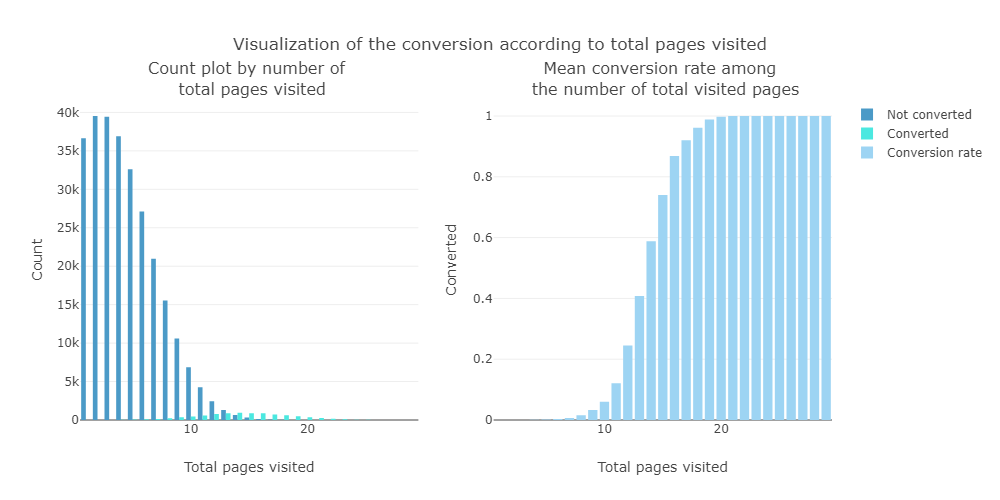

In [12]:
# Conversion vs total number of visited pages

pages_conv_mean = data[["total_pages_visited", "converted"]].groupby("total_pages_visited").mean().reset_index()

pages_fig = make_subplots(rows = 1, cols = 2, subplot_titles = ("Count plot by number of <br> total pages visited", "Mean conversion rate among <br> the number of total visited pages"))

pages_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 0')['converted'],
                                   x = data.query('converted == 0')["total_pages_visited"],
                                   name = "Not converted"),
                      row = 1, col = 1)
pages_fig.add_trace(go.Histogram(histfunc = "count",
                                   y = data.query('converted == 1')['converted'],
                                   x = data.query('converted == 1')["total_pages_visited"],
                                   name = "Converted"),
                      row = 1, col = 1)

pages_fig.add_trace(go.Bar(x = pages_conv_mean["total_pages_visited"], y = pages_conv_mean["converted"], name = "Conversion rate"),
                      row = 1, col = 2)

pages_fig.update_layout(title_text = "Visualization of the conversion according to total pages visited ", width = 1000)
pages_fig.update_xaxes(title_text = "Total pages visited", row = 1, col = 1)
pages_fig.update_xaxes(title_text = "Total pages visited", row = 1, col = 2)
pages_fig.update_yaxes(title_text = "Count", row = 1, col = 1)
pages_fig.update_yaxes(title_text = "Converted", row = 1, col = 2)

As this last graph shows, the more the number of pages visited increases, the more the conversion rate increases

## 2. Predict the conversions: model training

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier

### 2.1 Baseline ###
  
From the EDA, we know that the most useful feature is total_pages_visited.  
Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.

In [208]:
features_list = ['total_pages_visited']
target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

In [209]:
# Divide dataset Train set & Test set 
X_train_baseline, X_test_baseline, Y_train_baseline, Y_test_baseline = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [210]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
X_train_baseline = X_train_baseline.values
X_test_baseline = X_test_baseline.values
Y_train_baseline = Y_train_baseline.values
Y_test_baseline = Y_test_baseline.values

In [211]:
# Preprocessings for baseline model
featureencoder = StandardScaler()
X_train_baseline = featureencoder.fit_transform(X_train_baseline)
X_test_baseline = featureencoder.transform(X_test_baseline)

In [212]:
# Train model
classifier_LR1 = LogisticRegression() 
classifier_LR1.fit(X_train_baseline, Y_train_baseline)

LogisticRegression()

In [213]:
# Predictions on training set
Y_train_pred_baseline = classifier_LR1.predict(X_train_baseline)

# Predictions on test set
Y_test_pred_baseline = classifier_LR1.predict(X_test_baseline)

In [214]:
# Calculate th F1-score and store it in a global table for each model
scores = pd.DataFrame(columns = ["Score on train set", "Score on test set"])
train_baseline = f1_score(Y_train_baseline, Y_train_pred_baseline)
test_baseline = f1_score(Y_test_baseline, Y_test_pred_baseline)
scores = scores.append(pd.DataFrame({"Score on train set": train_baseline, "Score on test set": test_baseline}, index = ["Baseline"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\3518853061.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139


### 2.2 Try other models

#### 2.2.1 Initialize preprocessings pipeline

In [267]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop = 'first')

#### 2.2.2 Multivariate Logistic Regression  add variable by variable

In this section, a multivariate logistic regression is used.  
Variables are added by order of supposed importance.

**a. total_pages_visited + age**

In [268]:
# Prepare data 
features_list = ['total_pages_visited', 'age']
target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

In [269]:
# Divide dataset into Train set & Test set 
X_train_LR2, X_test_LR2, Y_train_LR2, Y_test_LR2 = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [270]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['total_pages_visited', 'age']
Found categorical features  []


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2249989688.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [271]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor_LR2 = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Preprocessings on train set
X_train_LR2 = preprocessor_LR2.fit_transform(X_train_LR2)

# Preprocessings on test set
X_test_LR2 = preprocessor_LR2.transform(X_test_LR2)

In [272]:
# Train model
classifier_LR2 = LogisticRegression()
classifier_LR2.fit(X_train_LR2, Y_train_LR2)

LogisticRegression()

In [273]:
# Predictions on training set
Y_train_pred_LR2 = classifier_LR2.predict(X_train_LR2)

# Predictions on test set
Y_test_pred_LR2 = classifier_LR2.predict(X_test_LR2)

In [222]:
# Calculate th F1-score and store it in a global table for each model
train_LR2 = f1_score(Y_train_LR2, Y_train_pred_LR2)
test_LR2 = f1_score(Y_test_LR2, Y_test_pred_LR2)

scores = scores.append(pd.DataFrame({"Score on train set": train_LR2, "Score on test set": test_LR2}, index = ["Logistic regression (total pages + age)"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\1390596979.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483


**b. total_pages_visited + age + new_user**

In [275]:
# Prepare data 
features_list = ['total_pages_visited', 'age', 'new_user']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

In [276]:
# Divide dataset into Train set & Test set 
X_train_LR3, X_test_LR3, Y_train_LR3, Y_test_LR3 = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [277]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['total_pages_visited', 'age', 'new_user']
Found categorical features  []


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2249989688.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [278]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor_LR3 = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Preprocessings on train set
X_train_LR3 = preprocessor_LR3.fit_transform(X_train_LR3)

# Preprocessings on test set
X_test_LR3 = preprocessor_LR3.transform(X_test_LR3)

In [227]:
# Train model
classifier_LR3 = LogisticRegression()
classifier_LR3.fit(X_train_LR3, Y_train_LR3)

LogisticRegression()

In [228]:
# Predictions on training set
Y_train_pred_LR3 = classifier_LR3.predict(X_train_LR3)

# Predictions on test set
Y_test_pred_LR3 = classifier_LR3.predict(X_test_LR3)

In [229]:
# Calculate th F1-score and store it in a global table for each model
train_LR3 = f1_score(Y_train_LR3, Y_train_pred_LR3)
test_LR3 = f1_score(Y_test_LR3, Y_test_pred_LR3)

scores = scores.append(pd.DataFrame({"Score on train set": train_LR3, "Score on test set": test_LR3}, index = ["Logistic regression (total pages + age + new user)"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\1053796920.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406


**c. total_pages_visited + age + new_user + country**

In [279]:
# Prepare data 
features_list = ['total_pages_visited', 'age', 'new_user', 'country']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

In [280]:
# Divide dataset into Train set & Test set 
X_train_LR4, X_test_LR4, Y_train_LR4, Y_test_LR4 = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [281]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['total_pages_visited', 'age', 'new_user']
Found categorical features  ['country']


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2249989688.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [282]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor_LR4 = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Preprocessings on train set
X_train_LR4 = preprocessor_LR4.fit_transform(X_train_LR4)

# Preprocessings on test set
X_test_LR4 = preprocessor_LR4.transform(X_test_LR4)

In [234]:
# Train model
classifier_LR4 = LogisticRegression()
classifier_LR4.fit(X_train_LR4, Y_train_LR4)

LogisticRegression()

In [235]:
# Predictions on training set
Y_train_pred_LR4 = classifier_LR4.predict(X_train_LR4)

# Predictions on test set
Y_test_pred_LR4 = classifier_LR4.predict(X_test_LR4)

In [236]:
# Calculate th F1-score and store it in a global table for each model
train_LR4 = f1_score(Y_train_LR4, Y_train_pred_LR4)
test_LR4 = f1_score(Y_test_LR4, Y_test_pred_LR4)

scores = scores.append(pd.DataFrame({"Score on train set": train_LR4, "Score on test set": test_LR4}, index = ["Logistic regression (total pages + age + new user + country)"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\4204634068.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107


**d. total_pages_visited + age + new_user + country + source**

In [283]:
# Prepare data 
target_variable = "converted"

X = data.drop(target_variable, axis = 1)
Y = data.loc[:,target_variable]

In [284]:
# Divide dataset into Train set & Test set 
X_train_LR5, X_test_LR5, Y_train_LR5, Y_test_LR5 = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [285]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['age', 'new_user', 'total_pages_visited']
Found categorical features  ['country', 'source']


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2249989688.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [286]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor_LR5 = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

# Preprocessings on train set
X_train_LR5 = preprocessor_LR5.fit_transform(X_train_LR5)

# Preprocessings on test set
X_test_LR5 = preprocessor_LR5.transform(X_test_LR5)

In [241]:
# Train model
classifier_LR5 = LogisticRegression()
classifier_LR5.fit(X_train_LR5, Y_train_LR5)

LogisticRegression()

In [242]:
# Predictions on training set
Y_train_pred_LR5 = classifier_LR5.predict(X_train_LR5)

# Predictions on test set
Y_test_pred_LR5 = classifier_LR5.predict(X_test_LR5)

In [243]:
# Calculate th F1-score and store it in a global table for each model
train_LR5 = f1_score(Y_train_LR5, Y_train_pred_LR5)
test_LR5 = f1_score(Y_test_LR5, Y_test_pred_LR5)

scores = scores.append(pd.DataFrame({"Score on train set": train_LR5, "Score on test set": test_LR5}, index = ["Logistic regression (total pages + age + new user + country + source)"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\4062397134.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171


#### 2.2.3 Prepare data for the next algorithms

In [244]:
# Prepare data 
target_variable = "converted"

X = data.drop(target_variable, axis = 1)
Y = data.loc[:,target_variable]

In [245]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['age', 'new_user', 'total_pages_visited']
Found categorical features  ['country', 'source']


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2249989688.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [246]:
# Divide dataset Train set & Test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [247]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean') 

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

In [248]:
# Preprocessings on train set
X_train = preprocessor.fit_transform(X_train)

# Preprocessings on test set
X_test = preprocessor.transform(X_test)

#### 2.2.4 Decision Tree

**a. Default decision tree**

In [249]:
# Train model
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [250]:
# Predictions on training set
Y_train_pred_DT = classifier_DT.predict(X_train)

# Predictions on test set
Y_test_pred_DT = classifier_DT.predict(X_test)

In [251]:
# Calculate th F1-score and store it in a global table for each model
train_DT = f1_score(Y_train, Y_train_pred_DT)
test_DT = f1_score(Y_test, Y_test_pred_DT)

scores = scores.append(pd.DataFrame({"Score on train set": train_DT, "Score on test set": test_DT}, index = ["Decision Tree"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2241523855.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171
Decision Tree,0.796823,0.733496


**b. With Grid Search**

In [252]:
classifier_DT = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}

# Perform grid search
gridsearch = GridSearchCV(classifier_DT, param_grid = params)
gridsearch.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Best hyperparameters :  {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best validation accuracy :  0.9854443229736061


In [253]:
# Predictions on training set
Y_train_pred_GridDT = gridsearch.predict(X_train)

# Predictions on test set
Y_test_pred_GridDT = gridsearch.predict(X_test)

In [254]:
# Calculate th F1-score and store it in a global table for each model
train_GridDT = f1_score(Y_train, Y_train_pred_GridDT)
test_GridDT = f1_score(Y_test, Y_test_pred_GridDT)

scores = scores.append(pd.DataFrame({"Score on train set": train_GridDT, "Score on test set": test_GridDT}, index = ["Decision Tree with Grid Search"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\2183536854.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171
Decision Tree,0.796823,0.733496
Decision Tree with Grid Search,0.765347,0.749550


#### 2.2.5 Random Forest 

**a. Default random forest**

In [255]:
# Train model
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, Y_train)

RandomForestClassifier()

In [256]:
# Predictions on training set
Y_train_pred_RF = classifier_RF.predict(X_train)

# Predictions on test set
Y_test_pred_RF = classifier_RF.predict(X_test)

In [257]:
# Calculate th F1-score and store it in a global table for each model
train_RF = f1_score(Y_train, Y_train_pred_RF)
test_RF = f1_score(Y_test, Y_test_pred_RF)

scores = scores.append(pd.DataFrame({"Score on train set": train_RF, "Score on test set": test_RF}, index = ["Random Forest"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\3372191631.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171
Decision Tree,0.796823,0.733496
Decision Tree with Grid Search,0.765347,0.749550
Random Forest,0.801538,0.747909


**b. Random Forest with Grid Search**

In [258]:
classifier_RF = RandomForestClassifier()

# Grid of values to be tested
params = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}

# Perform grid search
gridsearch_RF = GridSearchCV(classifier_RF, param_grid = params)
gridsearch_RF.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch_RF.best_params_)
print("Best validation accuracy : ", gridsearch_RF.best_score_)

Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 80}
Best validation accuracy :  0.9860104638450726


In [259]:
# Predictions on training set
Y_train_pred_GridRF = gridsearch_RF.predict(X_train)

# Predictions on test set
Y_test_pred_GridRF = gridsearch_RF.predict(X_test)

In [260]:
# Calculate th F1-score and store it in a global table for each model
train_GridRF = f1_score(Y_train, Y_train_pred_GridRF)
test_GridRF = f1_score(Y_test, Y_test_pred_GridRF)

scores = scores.append(pd.DataFrame({"Score on train set": train_GridRF, "Score on test set": test_GridRF}, index = ["Random Forest with Grid Search"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\3305320021.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171
Decision Tree,0.796823,0.733496
Decision Tree with Grid Search,0.765347,0.749550
Random Forest,0.801538,0.747909
Random Forest with Grid Search,0.778857,0.753153


#### 2.2.6 AdaBoost

##### 2.2.6.1 AdaBoost for Logistic Regression (with all variables)

In [261]:
logistic_regression = LogisticRegression()
model_LR = AdaBoostClassifier(logistic_regression)

# Grid of values to be tested
params = {
    'base_estimator__C': [0.01, 0.05, 0.1, 0.5,],
    'n_estimators': [5, 10, 20, 30]
}

# Perform grid search
gridsearch_AdaBoostLR = GridSearchCV(model_LR, param_grid = params)
gridsearch_AdaBoostLR.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch_AdaBoostLR.best_params_)
print("Best validation accuracy : ", gridsearch_AdaBoostLR.best_score_)
print()
print("Accuracy on training set : ", gridsearch_AdaBoostLR.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch_AdaBoostLR.score(X_test, Y_test))

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Oph

Best hyperparameters :  {'base_estimator__C': 0.5, 'n_estimators': 30}
Best validation accuracy :  0.9850148367952523

Accuracy on training set :  0.9850148367952523
Accuracy on test set :  0.9848900133530114


In [262]:
# Predictions on training set
Y_train_pred_AdaBoostLR = gridsearch_AdaBoostLR.predict(X_train)

# Predictions on test set
Y_test_pred_AdaBoostLR = gridsearch_AdaBoostLR.predict(X_test)

In [263]:
# Calculate th F1-score and store it in a global table for each model
train_AdaBoostLR = f1_score(Y_train, Y_train_pred_AdaBoostLR)
test_AdaBoostLR = f1_score(Y_test, Y_test_pred_AdaBoostLR)

scores = scores.append(pd.DataFrame({"Score on train set": train_AdaBoostLR, "Score on test set": test_AdaBoostLR}, index = ["AdaBoost - Logistic Regression"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\811771910.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171
Decision Tree,0.796823,0.733496
Decision Tree with Grid Search,0.765347,0.749550
Random Forest,0.801538,0.747909
Random Forest with Grid Search,0.778857,0.753153
AdaBoost - Logistic Regression,0.736401,0.735547


##### 2.2.6.2 AdaBoost for Decision Tree

In [264]:
decision_tree = DecisionTreeClassifier()
model_DT = AdaBoostClassifier(decision_tree)

# Grid of values to be tested
params = {
    'base_estimator__max_depth': [4, 6, 8],
    'base_estimator__min_samples_leaf': [1, 2, 5],
    'base_estimator__min_samples_split': [2, 4, 8],
    'n_estimators': [2, 4, 6, 8, 10]
}

# Perform grid search
gridsearch_AdaBoostDT = GridSearchCV(model_DT, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch_AdaBoostDT.fit(X_train, Y_train)

print("Best hyperparameters : ", gridsearch_AdaBoostDT.best_params_)
print("Best validation accuracy : ", gridsearch_AdaBoostDT.best_score_)
print()
print("Accuracy on training set : ", gridsearch_AdaBoostDT.score(X_train, Y_train))
print("Accuracy on test set : ", gridsearch_AdaBoostDT.score(X_test, Y_test))

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

c:\Users\Oph

Best hyperparameters :  {'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 5, 'base_estimator__min_samples_split': 2, 'n_estimators': 10}
Best validation accuracy :  0.9859479958413021

Accuracy on training set :  0.9861158831797595
Accuracy on test set :  0.9860496169794083


In [265]:
# Predictions on training set
Y_train_pred_AdaBoostDT = gridsearch_AdaBoostDT.predict(X_train)

# Predictions on test set
Y_test_pred_AdaBoostDT = gridsearch_AdaBoostDT.predict(X_test)

In [266]:
# Calculate th F1-score and store it in a global table for each model
train_AdaBoostDT = f1_score(Y_train, Y_train_pred_AdaBoostDT)
test_AdaBoostDT = f1_score(Y_test, Y_test_pred_AdaBoostDT)

scores = scores.append(pd.DataFrame({"Score on train set": train_AdaBoostDT, "Score on test set": test_AdaBoostDT}, index = ["AdaBoost - Decision Tree"], columns = scores.columns))
scores

C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\57227981.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Score on train set,Score on test set
Baseline,0.695014,0.696139
Logistic regression (total pages + age),0.708826,0.707483
Logistic regression (total pages + age + new user),0.742457,0.742406
Logistic regression (total pages + age + new user + country),0.761924,0.767107
Logistic regression (total pages + age + new user + country + source),0.762575,0.771171
Decision Tree,0.796823,0.733496
Decision Tree with Grid Search,0.765347,0.749550
Random Forest,0.801538,0.747909
Random Forest with Grid Search,0.778857,0.753153
AdaBoost - Logistic Regression,0.736401,0.735547


If we look at the results presented in the table below, we can see that the best balance of scores is obtained with the logistic regression algorithm with all the variables.  
Indeed, the score on the train set is 0.762575 and 0.771171 on the test set. We therefore do not observe any overfitting with this algorithm, which is even more efficient on the test set than on the train set, according to our results.

## 3. Train best classifier on all data and use it to make predictions on X_without_labels
Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.

In [294]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train, X_test, axis = 0)
Y = np.append(Y_train, Y_test)

In [295]:
# Train your best model on all the train dataset
classifier_LR5.fit(X, Y)

c:\Users\Ophélie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [296]:
# Read data without labels
data_without_labels = pd.read_csv('./data/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

features_list = ['total_pages_visited', 'country', 'age', 'new_user', 'source']
X_without_labels = data_without_labels.loc[:, features_list]

Prediction set (without labels) : (31620, 5)


In [297]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X_without_labels.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['total_pages_visited', 'age', 'new_user']
Found categorical features  ['country', 'source']


C:\Users\Ophélie\AppData\Local\Temp\ipykernel_16516\3728999899.py:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [298]:
# Preprocessings on test set
X_without_labels = preprocessor_LR5.transform(X_without_labels)

In [299]:
# Make predictions and dump to file
data = {
    'converted': classifier_LR5.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns = ['converted'], data = data)
Y_predictions.to_csv('./test_predictions/Test_predictions_LogisticRegression.csv', index = False)

During the challenge, three submissions of results were made.  
Here, only those obtained with the algorithm chosen as being the best, i.e. logistic regression, are kept in the "test_predictions" folder.

## 4. Analyzing the best model and interpreting the result

The last step of this project is therefore to study the results obtained with the best algorithm and to make recommendations to the client so that he can improve his conversion rate.

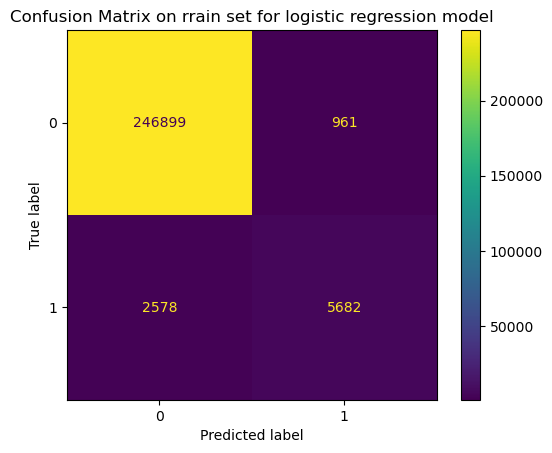

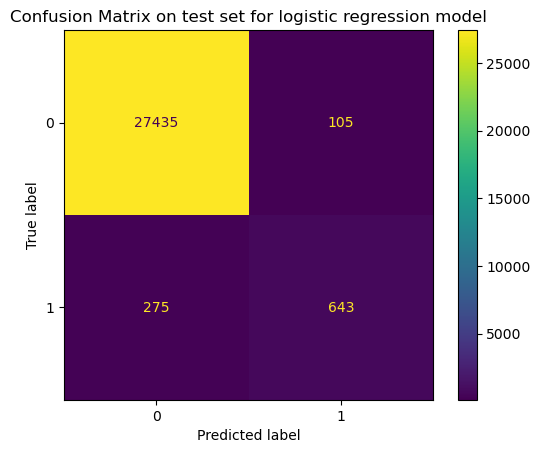

In [300]:
# Visualize confusion matrices
_ , ax = plt.subplots() 
ax.set(title = "Confusion Matrix on rrain set for logistic regression model") 
ConfusionMatrixDisplay.from_estimator(classifier_LR5, X_train, Y_train, ax = ax)
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title = "Confusion Matrix on test set for logistic regression model")
ConfusionMatrixDisplay.from_estimator(classifier_LR5, X_test, Y_test, ax = ax) 
plt.show()

From the confusion matrices above, it can be seen that the logistic regression model trained here is mostly wrong in predicting false negatives (true label = 1, predicted label = 0).  
The algorithm will therefore tend to underestimate the conversion rate compared to reality.  
However, the number of positive results (conversion = 1) in the data sample being quite low compared to the sample size, the results below can be considered correct, but could perhaps be improved by increasing the sample size.

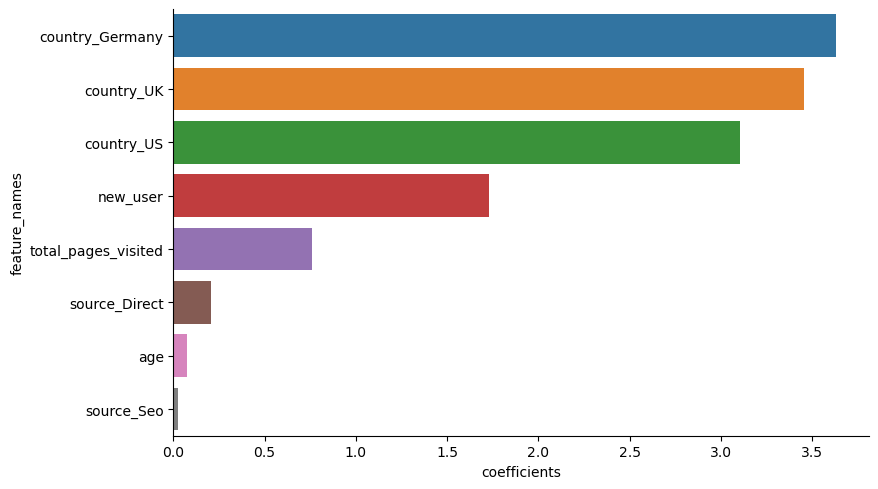

In [302]:
# Investigate features importance for the conversion status

column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": column_names,
    "coefficients": classifier_LR5.coef_[0]
})

# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(y = "feature_names", 
            x = "coefficients", 
            data = feature_importance.sort_values(by = "coefficients", ascending = False), 
            kind = "bar",
            aspect = 16/9,
            orient = 'h') # Resize graph

From the histogram above, we can see that the variables with the most importance in the conversion decision are the country, in particular Germany, the fact of being a new user or not, as well as the number of pages visited.

In order to improve his conversion rate, our client could consider the following tracks:
- distribute its newsletter in order to include as a target countries which do not yet, or rarely, adhere to it (in particular France, China, etc.),
- encourage new users to join immediately, as they are less inclined to subscribe than those who already know it, via partner offers or a free trial for example,
- use the networks (LinkedIn in particular) to advertise its newsletter to a wider audience...
Obviously, other recommendations may be made as these are implemented, following the evolution of the number of subscriptions.